### License Plate Recognition using OpenCV

In [37]:
import cv2
import pytesseract
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd=r"C:\Program Files\Tesseract-OCR\tesseract.exe"

In [38]:
cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_russian_plate_number.xml")

In [39]:
states={
    "AN":"Andaman and Nicobar", "AP":"Andhra Pradesh", "AR":"Arunachal Pradesh", "AS":"Assam",
    "BR":"Bihar", "CG":"Chhattisgarh", "CH":"Chandigarh", "DN":"Dadra and Nagar Haveli", "DD":"Daman and Diu",
    "DL":"Delhi", "GA":"Goa", "GJ":"Gujarat", "HP":"Himachal Pradesh", "HR":"Haryana",
    "JH":"Jharkhand", "JK":"Jammu and Kashmir", "KA":"Karnataka", "KL":"Kerala", "LA":"Ladakh", 
    "LD":"Lakshadweep", "MH":"Maharashtra", "ML":"Meghalaya", "MN":"Manipur", "MP":"Madhya Pradesh",
    "MZ":"Mizoram", "NL":"Nagaland", "OD":"Odisha", "PB":"Punjab", "PY":"Puducherry", "RJ":"Rajasthan",
    "SK":"Sikkim", "TN":"Tamil Nadu", "TR":"Tripura", "TS":"Telangana", "UK":"Uttarakhand", "UP":"Uttar Pradesh", "WB":"West Bengal"}


This vehical is from  Delhi
DLECAFSO30


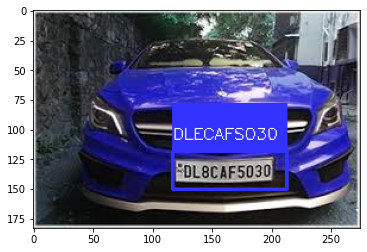

In [141]:
def extract_num(img_name):
  img = cv2.imread(img_name)
  gray=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  noplate = cascade.detectMultiScale(gray, 1.1, 3) #best i can get for good accuracy
  for (x, y, w, h) in noplate:
    # cropping noplate
    a, b = (int(0.02*img.shape[0]), int(0.025*img.shape[1]))
    plate = img[y+a:y+h-a, x+b:x+w-b, :]
    
    # processing image(by threshold technique)
    kernal=np.ones((1, 1), np.uint8)
    plate=cv2.dilate(plate, kernal, iterations=1)
    plate=cv2.erode(plate, kernal, iterations=1)
    plate_gray=cv2.cvtColor(plate, cv2.COLOR_BGR2GRAY)
    (thresh, plate)=cv2.threshold(plate_gray, 127, 255, cv2.THRESH_BINARY)
    
    #converting image to string and extracting the number from number plate
    read=pytesseract.image_to_string(plate)
    read=''.join(i for i in read if i.isalnum())
    st=read[0:2]
    # state output
    try:
      print("This vehical is from ", states[st])
    except:
      print("The State is not recognised--!!")
    print(read)
    cv2.rectangle(img, (x, y), (x+w, y+h), (51, 51, 255), 2)
    cv2.rectangle(img, (x, y-40), (x+w, y), (51, 51, 255), -1)
    cv2.putText(img, read, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 255, 255), 1)
    plt.imshow(plate)

  plt.imshow(img)
  cv2.imwrite("result.jpg", img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

extract_num("pt8.jpg")
